In [1]:
# https://github.com/microsoft/vscode-jupyter/issues/7096

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt

# question1
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
print(device)


class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(7 * 7 * 64, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 7 * 7 * 64)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


model = SimpleCNN()

torch.save(model, "mnist.pt")
model = torch.load('mnist.pt',weights_only=False)
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy


accuracy = evaluate_model(model, test_loader)
print(f"Test accuracy on FashionMNIST: {accuracy * 100:.2f}%")


# def fine_tune_model(model, train_loader, test_loader, epochs=5):
#     criterion = nn.CrossEntropyLoss()
#     optimizer = optim.Adam(model.parameters(), lr=0.001)

#     for epoch in range(epochs):
#         model.train()
#         running_loss = 0.0
#         for inputs, labels in train_loader:
#             optimizer.zero_grad()

#             outputs = model(inputs)
#             loss = criterion(outputs, labels)

#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()
#         accuracy = evaluate_model(model, test_loader)
#         print(
#             f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}, Accuracy: {accuracy * 100:.2f}%")


# fine_tune_model(model, train_loader, test_loader, epochs=5)


# def show_predictions(model, test_loader, num_images=5):
#     model.eval()
#     data_iter = iter(test_loader)
#     inputs, labels = next(data_iter)
#     outputs = model(inputs)
#     _, predicted = torch.max(outputs, 1)

#     fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
#     for i in range(num_images):
#         axes[i].imshow(inputs[i].squeeze(), cmap='gray')
#         axes[i].set_title(f"Pred: {predicted[i].item()}, True: {labels[i].item()}")
#         axes[i].axis('off')

#     plt.show()


# show_predictions(model, test_loader)

100%|███████████████████████████| 26421880/26421880 [01:29<00:00, 294589.45it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|█████████████████████████████████| 29515/29515 [00:00<00:00, 111059.57it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████████████████████████| 4422102/4422102 [01:50<00:00, 40136.66it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|█████████████████████████████████| 5148/5148 [00:00<00:00, 16101623.41it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

cuda
Test accuracy on FashionMNIST: 9.70%


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/student/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100.0%


Epoch 1/5, Loss: 0.2491, Accuracy: 95.80%
Epoch 2/5, Loss: 0.2009, Accuracy: 95.70%
Epoch 3/5, Loss: 0.2028, Accuracy: 96.60%
Epoch 4/5, Loss: 0.1777, Accuracy: 96.30%
Epoch 5/5, Loss: 0.1792, Accuracy: 96.20%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.3301654..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4842881..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0357141..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].


Final Accuracy on the validation set: 96.20%


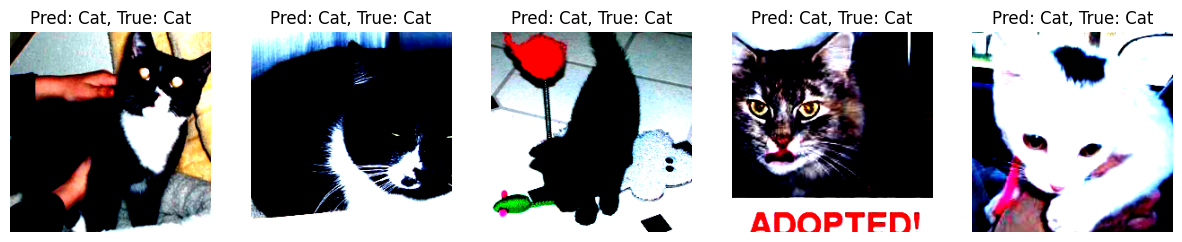

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision import datasets
import matplotlib.pyplot as plt
import os

# question2
transform = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
}

data_dir = './data/cats_and_dogs_filtered'
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform['train'])
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'validation'), transform['val'])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

model = models.alexnet(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.classifier[6] = nn.Linear(model.classifier[6].in_features, 2)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

epochs = 5


def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5):
    best_acc = 0.0
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(
            f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}, Accuracy: {accuracy * 100:.2f}%")

        if accuracy > best_acc:
            best_acc = accuracy
            torch.save(model.state_dict(), 'best_model.pth')


train_model(model, train_loader, val_loader, criterion, optimizer, epochs)

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Final Accuracy on the validation set: {accuracy * 100:.2f}%")


def visualize_predictions(model, val_loader):
    model.eval()
    data_iter = iter(val_loader)
    inputs, labels = next(data_iter)
    outputs = model(inputs.to(device))
    _, predicted = torch.max(outputs, 1)

    fig, axes = plt.subplots(1, 5, figsize=(15, 15))
    for i in range(5):
        axes[i].imshow(inputs[i].permute(1, 2, 0).cpu().numpy())
        axes[i].set_title(f"Pred: {'Dog' if predicted[i] == 1 else 'Cat'}, True: {'Dog' if labels[i] == 1 else 'Cat'}")
        axes[i].axis('off')

    plt.show()


visualize_predictions(model, val_loader)

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision import datasets
import os


# Save checkpoint function
def save_checkpoint(state, filename="checkpoint.pth.tar"):
    """Saves the checkpoint to a file."""
    torch.save(state, filename)
    print(f"Checkpoint saved to {filename}")


# Load checkpoint function
def load_checkpoint(model, optimizer, filename="checkpoint.pth.tar"):
    """Loads a checkpoint from a file."""
    if os.path.isfile(filename):
        print(f"Loading checkpoint from {filename}")
        checkpoint = torch.load(filename)
        model.load_state_dict(checkpoint['state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        best_acc = checkpoint['best_acc']
        print(f"Resuming training from epoch {epoch}, best accuracy: {best_acc * 100:.2f}%")
        return model, optimizer, epoch, best_acc
    else:
        print("No checkpoint found, starting fresh.")
        return model, optimizer, 0, 0.0


# Training function with checkpointing
def train_model_with_checkpoint(model, train_loader, val_loader, criterion, optimizer, num_epochs=5,
                                checkpoint_interval=1, resume_from_checkpoint=False):
    best_acc = 0.0
    start_epoch = 0

    if resume_from_checkpoint:
        model, optimizer, start_epoch, best_acc = load_checkpoint(model, optimizer, "best_model.pth.tar")

    for epoch in range(start_epoch, num_epochs):
        model.train()
        running_loss = 0.0

        # Training loop
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        model.eval()
        correct = 0
        total = 0

        # Validation loop
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(
            f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}, Accuracy: {accuracy * 100:.2f}%")

        # Save the best model based on accuracy
        if accuracy > best_acc:
            best_acc = accuracy
            print(f"New best accuracy: {accuracy * 100:.2f}%")
            save_checkpoint({
                'epoch': epoch + 1,
                'state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': running_loss / len(train_loader),
                'best_acc': best_acc
            }, filename="best_model.pth.tar")

        # Save checkpoint at regular intervals
        if (epoch + 1) % checkpoint_interval == 0:
            save_checkpoint({
                'epoch': epoch + 1,
                'state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': running_loss / len(train_loader),
                'best_acc': best_acc
            }, filename=f"checkpoint_epoch_{epoch + 1}.pth.tar")


# Data loading and transformation
data_dir = './data/cats_and_dogs_filtered'

transform = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
}

train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform['train'])
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'validation'), transform['val'])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Model setup
model = models.alexnet(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
model.classifier[6] = nn.Linear(model.classifier[6].in_features, 2)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

# Start training with checkpointing
train_model_with_checkpoint(model, train_loader, val_loader, criterion, optimizer, num_epochs=5, checkpoint_interval=1,
                            resume_from_checkpoint=False)

Epoch 1/5, Loss: 0.2581, Accuracy: 95.40%
New best accuracy: 95.40%
Checkpoint saved to best_model.pth.tar
Checkpoint saved to checkpoint_epoch_1.pth.tar
Epoch 2/5, Loss: 0.2012, Accuracy: 97.10%
New best accuracy: 97.10%
Checkpoint saved to best_model.pth.tar
Checkpoint saved to checkpoint_epoch_2.pth.tar
Epoch 3/5, Loss: 0.1933, Accuracy: 95.00%
Checkpoint saved to checkpoint_epoch_3.pth.tar
Epoch 4/5, Loss: 0.2056, Accuracy: 96.10%
Checkpoint saved to checkpoint_epoch_4.pth.tar
Epoch 5/5, Loss: 0.1895, Accuracy: 96.00%
Checkpoint saved to checkpoint_epoch_5.pth.tar
